<a href="https://colab.research.google.com/github/jmalonso55/MVP_Jorge_Alonso_Analise_de_dados/blob/main/An%C3%A1lise_dos_dados_do_invent%C3%A1rio_florestal_do_Esp%C3%ADrito_Santo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEFINIÇÃO DO PROBLEMA:**

A base de dados utilizada foi a do Inventário Florestal Nacional (IFN) para o estado do Espírito Santo (ES), disponibilizada publicamente no site do Serviço Florestal Brasileiro (SFB / MAPA). Como não há dados disponíveis para o estado do Rio de Janeiro, os dados do ES foram escolhidos como referência por ser vizinho ao RJ e apresentar fitofisionomias semelhantes (link de acesso: https://snif.florestal.gov.br/pt-br/inventario-florestal-nacional-ifn/ifn-dados-abertos/ifn-resultados-espirito-santo).

O IFN é um levantamento feito pelo governo federal com a finalidade de produzir informações sobre os recursos florestais brasileiros, tendo cunho estratégico. Por outro lado, inventários florestais podem ser realizados com cunho tático para atender a demandas de empresas tais como conhecer a dinâmica de uma floresta e elaborar planos para seu manejo e exploração. Uma das demandas de empresas por inventários é para a obtenção de uma Autorização de Supressão Vegetal (ASV), visto que um dos documentos exigidos para a ASV é o inventário florestal e florístico da vegetação a ser suprimida. Esse é um procedimento muito comum na construção civil de empreendimentos imobiliários, industriais e outros. 

Diversas variáveis qualitativas e quantitativas podem ser mensuradas em um inventário florestal. Em geral, quanto mais variáveis forem mensuradas maior é o tempo gasto e maiores serão os custos para sua realização. Portanto, é do interesse das empresas a mensuração do menor número possível de variáveis que possam fornecer as informações necessárias para atender à sua demanda. 

O diâmetro à altura do peito (DAP) e a altura total são as principais variáveis quantitativas mensuradas em inventários florestais. Enquanto o DAP pode ser mensurado por meio de fita métrica, suta diâmetrica ou outros instrumentos de fácil operação, mensurar a altura é um procedimento mais complicado. Por exemplo, quando se utiliza vara graduada é muito difícil carregar a ferramenta em uma floresta fechada. Mesmo no caso de uma vara retrátil a operação é difícil e demorada devido a necessidade de abrir e fechar o equipamento na mata, além da dificuldade de visualizar o topo das árvores. Por isso, o procedimento mais comum é estimar a altura com hipsômetros que são aparelhos que utilizam princípios geométricos ou trigonométricos para obter a medida. Ainda assim, persistem as dificuldades como a de se visualizar o topo das árvores e a de encontrar uma distância horizontal conveniente para medição em uma floresta fechada.

Visando atender à necessidade de empresas que realizam inventários florestais e florísticos para obtenção de ASV nos estados do Sudeste, o objetivo deste trabalho é conduzir uma análise exploratória dos dados do IFN no ES para identificar o potencial de se estimar a altura de árvores a partir de outras variáveis mais fáceis de mensurar.

Este seria um problema de aprendizado supervisionado da categoria regressão. Algumas hipóteses seriam:
1) Existe correlação significativa entre o DAP e a altura total;
2) Existe relação da altura total com variáveis qualitativas fáceis de mensurar;
3) A altura do fuste (variável mais fácil de medir) possui correlação com a altura total;
4) É viável utilizar outras variáveis mais fáceis de medir para estimar a altura total.

Quanto às restrições, o foco do projeto serão as áreas definidas pelo IFN como "floresta típica secundária jovem". Já que os inventários florestais e florísticos para supressão normalmente tem como objeto uma floresta natural em estágio secundário, ou seja, com certo nível de distúbio causado por atividade humana. Além disso, serão considerados apenas os dados coletados para árvores adultas (DAP > 10 cm), considerando que elas são as mais difíceis de mensurar an altura total nas florestas naturais. Admiti-se a possibilidade de identificar outras restrições a partir da análise exploratória dos dados. Por fim, serão considerados apenas os dados de subunidades amostrais localizadas 100% em área de vegetação florestal, visando eliminar a influência de efeito de borda.

O primeiro dataset que será carregado apresenta as seguintes variáveis: 1) UA - Unidade amostral; 2) SU - Subunidade; 3) SUBP - Subparcela; 4) COD_ARV - nº sequencial do indivíduo medido em cada Subunidade; 5) FUSTE - nº do fuste; 6) DAP - diâmetro à altura do peito (1,30 m), em centímetros; 7) SA - estado de sanidade do fuste; 8) QF - qualidade do fuste; 9) PS - posição sociológica; 10) AFF - árvore fora da floresta; 11) HT - altura total, em metros; 12) HF - altura do fuste, em metros; 13) PL - presença ou ausência de lianas; 14) HAB - hábito da planta; 15) MB - indivíduo com ou sem coleta botânica (link de acesso aos metadados: https://snif.florestal.gov.br/images/pdf/recursos_florestais/IFN/IFN-ES/Metadados_IFN-ES_Arvores_dap_maior_igual_10_18-11-2020.pdf).

In [3]:
# Carrega as bibliotecas utilizadas
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Importa os dados de medição no ES do repositório no GitHub
url_dados = 'https://raw.githubusercontent.com/jmalonso55/MVP_Jorge_Alonso_Analise_de_dados/main/IFN-ES_arvores_dap_maior_10cm_18-11-2020.csv'

# Carrega o dataset por meio da url
inv_es = pd.read_csv(url_dados, sep=";", decimal=",")

In [5]:
# Verifica se os dados estão no formato dataframe
type(inv_es)

pandas.core.frame.DataFrame

In [6]:
# Verifica quantas instâncias e atributos existem no dataset
inv_es.shape

(8522, 15)

O dataset apresenta 8.522 instâncias (nº de indivíduos arbóreos observados) e 15 atributos (as variáveis mensuradas e que tiveram suas siglas descritas anteriormente). Cabe mencionar que não há entre as variáveis uma que indique a fitofisionomia predominante em cada parcela. Para obter essa informação e filtrar os dados será preciso recorrer a outro dataset. 

In [7]:
# Verifica os tipos de dados dos atributos
inv_es.dtypes

UA          object
SU           int64
SUBP         int64
COD_ARV      int64
FUSTE        int64
DAP        float64
SA           int64
QF           int64
PS           int64
AFF          int64
HT         float64
HF         float64
PL           int64
HAB        float64
MB           int64
dtype: object

Neste ponto é oportuno observar que algumas destas variáveis foram tabuladas como números inteiros (quantitativa discreta), mas na verdade são variáveis qualitativas. Por exemplo, a variável sanidade do fuste (SA), detalhada na sequência.

In [8]:
# Inspeciona os valores assumidos pela variável SA
inv_es['SA'].unique()

array([1, 2, 3, 4])

A varíavel assume valores de 1 a 4, que segundo os metadados do levantamento correspondem a: 1 – Sadio, sem defeitos aparentes; 2 –Estágio inicial de deterioração por pragas ou doenças; 3 –Estágio avançado de deterioração por pragas ou doenças; 4 –Árvore morta em pé. Os níveis desta variável podem ser interpretados como dados qualitativos ordinais, como descrito acima, ou quantitativos discretos medindo o grau de sanidade do fuste, considerando que quanto maior o valor, mais deteriorado está o fuste.


In [9]:
# Inspeciona as seis primeiras linhas do dataset
inv_es.head(10)

,UA,SU,SUBP,COD_ARV,FUSTE,DAP,SA,QF,PS,AFF,HT,HF,PL,HAB,MB
0,ES_10,1,1,1,1,10.3,1,1,4,0,9.5,5.0,0,NaN,0
1,ES_10,1,1,2,1,10.7,1,2,4,0,9.3,4.7,0,NaN,0
2,ES_10,1,1,3,1,10.4,1,2,4,0,9.3,4.5,0,NaN,0
3,ES_10,1,1,4,1,10.3,1,1,4,0,9.5,4.0,0,NaN,0
4,ES_10,1,1,5,1,10.4,1,1,4,0,9.6,4.5,0,NaN,0
5,ES_10,1,1,6,1,10.7,1,1,4,0,9.3,4.0,0,NaN,0
6,ES_10,1,1,7,1,10.3,1,2,4,0,9.2,4.5,0,NaN,0
7,ES_10,1,2,8,1,11.5,1,2,4,0,9.5,4.4,0,NaN,0
8,ES_10,1,2,9,1,10.9,2,2,4,0,9.4,4.3,0,NaN,0
9,ES_10,1,2,10,1,10.1,1,1,4,0,9.3,4.2,0,NaN,0


O dataset parece ter sido carregado corretamente. É possível reparar a existência de NaNs e 0 (zero) em algumas colunas. Algumas destas variáveis não são de interesse para a análise que se pretende fazer, mas convém analisar com mais detalhe a existência de dados faltantes e inconsistentes.

In [10]:
# Verificando a presença de nulls no dataset
inv_es.isnull().sum()

UA            0
SU            0
SUBP          0
COD_ARV       0
FUSTE         0
DAP           0
SA            0
QF            0
PS            0
AFF           0
HT            0
HF            0
PL            0
HAB        8522
MB            0
dtype: int64

A única variável em que apresenta "nulls" é a HAB (hábito da planta), que não é de interesse, visto que apenas árvores serão avaliadas. Mais adiante, pode-se retirar essa variável do dataset que será trabalhado (*feature selection*).

In [11]:
# Verificando a presença de zeros no dataset
(inv_es == 0).sum()

UA            0
SU            0
SUBP          0
COD_ARV       0
FUSTE         0
DAP           0
SA            0
QF            0
PS            0
AFF        8207
HT            0
HF            1
PL         4596
HAB           0
MB         7004
dtype: int64

Verifica-se um número considerável de zeros em algumas variáveis. Em 3 dos 4 casos, são variáveis com respostas binárias (0 = não e 1 = sim). Para altura do fuste (HF) zero é um valor possível, significando uma bifurcação no nível do solo (talvez um valor discrepante, mas não inválido).

In [12]:
# Gerando um resumo geral para algumas variáveis de interesse
inv_es[["DAP", "HT", "HF"]].describe()

,DAP,HT,HF
count,8522.000000,8522.000000,8522.000000
mean,16.577188,11.773375,7.657451
std,7.685894,5.182140,4.270885
min,10.000000,1.400000,0.000000
25%,11.825000,8.000000,4.500000
50%,14.200000,11.000000,7.000000
75%,18.400000,14.500000,10.000000
max,100.700000,32.400000,25.700000


Observa-se uma variação alta dos dados. Neste levantamento foram coletados dados em diferentes tipos de vegetação, como florestas plantadas, naturais, áreas agrícolas etc. Convém filtrar o dataset para a fitofisionomia que se deseja avaliar (floresta secundária jovem) e conferir novamente os valores dessas medidas.

In [13]:
# Importando os dados de uso da terra no US do repositório do GitHub
url_dados_ut = 'https://raw.githubusercontent.com/jmalonso55/MVP_Jorge_Alonso_Analise_de_dados/main/IFN-ES_uso_da_terra_subparcelas_18-11-2020.csv'

# Carrega o dataset por meio da URL
inv_es_ut = pd.read_csv(url_dados_ut, sep=";", decimal=",")

In [14]:
# Verifica se os dados estão no formato dataframe
type(inv_es_ut)

pandas.core.frame.DataFrame

In [15]:
# Verifica quantas instâncias e atributos existem no dataset
inv_es_ut.shape

(411, 18)

Há um número menor de instâncias e um número maior de atributos neste dataset. Aqui há uma instância (linha) para cada subunidade dentro de cada unidade amostral mensurada. Segundo os metadados do levantamento, os atributos são o seguinte: 1) UA - Unidade amostral; SU - subunidade, de 1 a 4; 3 a 12) SUBP1, SUBP2, ..., SUBP10 - classe de uso da terra em cada uma das 10 Subparcelas de cada subunidade; 13) CONT_TOCO: quantidade de todos encontrados; 14) FLORESTA: porcentagem da área da subunidade coberta por “floresta”; 15) ARVORES: porcentagem da área da subunidade coberta por “outras terras com árvores”; 16) NATURAL: porcentagem da área da subunidade coberta por “outras terras com vegetação natural”; 17) AGRICULTURA: porcentagem da área da unidade amostral coberta por “agricultura”; 18) OUTRAS: porcentagem da área da unidade amostral coberta por “outras áreas”.
Link de acesso aos metadados: https://snif.florestal.gov.br/images/pdf/recursos_florestais/IFN/IFN-ES/Metadados_IFN-ES_Uso_da_terra_18-11-2020.pdf

In [16]:
# Verifica se os dados estão em formato dataframe
type(inv_es_ut)

pandas.core.frame.DataFrame

In [17]:
# Verifica as primeiras linhas do dataset
inv_es_ut.head(10)

,UA,SU,SUBP1,SUBP2,SUBP3,SUBP4,SUBP5,SUBP6,SUBP7,SUBP8,SUBP9,SUBP10,CONT_TOCO,FLORESTA,ARVORES,NATURAL,AGRICULTURA,OUTRAS
0,ES_10,1,19,19,19,19,19,19,19,19,19,19,0,1.0,0.0,0.0,0.0,0.0
1,ES_10,2,19,19,19,19,19,19,19,19,19,19,0,1.0,0.0,0.0,0.0,0.0
2,ES_10,3,19,19,19,19,19,19,19,19,19,19,0,1.0,0.0,0.0,0.0,0.0
3,ES_10,4,19,19,19,19,19,19,19,19,19,19,0,1.0,0.0,0.0,0.0,0.0
4,ES_100,1,45,45,45,45,45,45,58,58,58,58,0,0.0,0.0,0.0,0.6,0.4
5,ES_100,2,45,45,45,45,45,45,45,45,45,45,0,0.0,0.0,0.0,1.0,0.0
6,ES_100,3,45,45,45,58,45,45,55,45,55,42,0,0.0,0.0,0.0,0.7,0.3
7,ES_100,4,45,45,45,45,45,45,45,45,45,42,0,0.0,0.0,0.0,1.0,0.0
8,ES_101,1,113,113,113,113,113,113,55,55,19,19,0,0.8,0.0,0.0,0.0,0.2
9,ES_101,2,19,19,19,19,19,19,19,19,19,19,0,1.0,0.0,0.0,0.0,0.0


In [18]:
# Verificando a presença de nulls no dataset
inv_es_ut.isnull().sum()

UA             0
SU             0
SUBP1          0
SUBP2          0
SUBP3          0
SUBP4          0
SUBP5          0
SUBP6          0
SUBP7          0
SUBP8          0
SUBP9          0
SUBP10         0
CONT_TOCO      0
FLORESTA       0
ARVORES        0
NATURAL        0
AGRICULTURA    0
OUTRAS         0
dtype: int64

Verifica-se que o dataset aparenta ter sido corretamente carregado e que não há presença de nulls. Neste dataset, a presença de zeros não é um problema para o filtro que se deseja aplicar.

In [19]:
# Filtrando dados para obter as parcelas com 100% das subparcelas em floresta secundária jovem
flo_sec = inv_es_ut[(inv_es_ut['FLORESTA'] == '1.0') & (inv_es_ut['SUBP1'] == 113) & (inv_es_ut['SUBP2'] == 113) &
                    (inv_es_ut['SUBP3'] == 113) & (inv_es_ut['SUBP4'] == 113) & (inv_es_ut['SUBP5'] == 113) &
                    (inv_es_ut['SUBP6'] == 113) & (inv_es_ut['SUBP7'] == 113) & (inv_es_ut['SUBP8'] == 113) &
                    (inv_es_ut['SUBP9'] == 113) & (inv_es_ut['SUBP10'] == 113)]
flo_sec.head(10)

,UA,SU,SUBP1,SUBP2,SUBP3,SUBP4,SUBP5,SUBP6,SUBP7,SUBP8,SUBP9,SUBP10,CONT_TOCO,FLORESTA,ARVORES,NATURAL,AGRICULTURA,OUTRAS
11,ES_101,4,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
12,ES_102,1,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
13,ES_102,2,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
14,ES_102,3,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
15,ES_102,4,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
25,ES_105,2,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
37,ES_108,2,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
41,ES_109,2,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
116,ES_18,3,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0
146,ES_28,1,113,113,113,113,113,113,113,113,113,113,0,1.0,0.0,0.0,0.0,0.0


O filtro foi aplicado selecionando todas as linhas onde as seguintes condições foram observadas: 1) A subunidade amostral apresentava sua área 100% coberta por floresta (FLORESTA = 1.0); 2) As dez subparcelas foram alocadas em vegetação de floresta secundária jovem (código 113). 

In [20]:
# Verificando quantas subunidades atendem aos requisitos
flo_sec['UA'].count()

42

De 411 unidades mensuradas no total, 42 atenderam aos requisitos estabelecidos.

In [21]:
# Cruzando os dados de um dataset com o outro
subpar_flo_sec = pd.merge(flo_sec[['UA', 'SU']], inv_es, on=['UA', 'SU'])
subpar_flo_sec.head(10)

,UA,SU,SUBP,COD_ARV,FUSTE,DAP,SA,QF,PS,AFF,HT,HF,PL,HAB,MB
0,ES_101,4,1,1,1,11.6,1,2,2,0,11.0,6.5,0,NaN,0
1,ES_101,4,1,2,1,11.2,1,2,3,0,9.0,6.0,0,NaN,0
2,ES_101,4,1,3,1,15.3,1,2,1,0,21.0,13.0,0,NaN,0
3,ES_101,4,1,4,1,14.3,1,2,2,0,12.0,6.0,1,NaN,0
4,ES_101,4,1,5,1,14.3,2,2,2,0,15.0,7.0,1,NaN,1
5,ES_101,4,1,6,1,11.9,1,3,2,0,12.0,4.0,1,NaN,0
6,ES_101,4,1,7,1,11.9,3,3,3,0,3.0,2.0,1,NaN,0
7,ES_101,4,1,8,1,10.1,3,3,3,0,2.5,1.7,0,NaN,0
8,ES_101,4,1,9,1,13.3,1,2,2,0,12.0,7.0,1,NaN,0
9,ES_101,4,2,10,1,10.5,1,2,3,0,7.5,5.0,1,NaN,1


In [22]:
# Verificando o número de árvores selecionadas segundo os requisitos estabelecidos
subpar_flo_sec['DAP'].count()

1249

Primeiro, observa-se que os dados foram devidamente filtrados e depois que das 8.522 árvores mensuradas no inventário do ES 1.249 estavam localizadas em subunidades cobertas por 100% de floresta secundária jovem.

In [23]:
# Retirando as colunas com variáveis que não serão utilizadas nas análises
dados = subpar_flo_sec.drop(['COD_ARV', 'FUSTE', 'AFF', 'PL', 'HAB', 'MB'], axis=1)
dados.head(10)

,UA,SU,SUBP,DAP,SA,QF,PS,HT,HF
0,ES_101,4,1,11.6,1,2,2,11.0,6.5
1,ES_101,4,1,11.2,1,2,3,9.0,6.0
2,ES_101,4,1,15.3,1,2,1,21.0,13.0
3,ES_101,4,1,14.3,1,2,2,12.0,6.0
4,ES_101,4,1,14.3,2,2,2,15.0,7.0
5,ES_101,4,1,11.9,1,3,2,12.0,4.0
6,ES_101,4,1,11.9,3,3,3,3.0,2.0
7,ES_101,4,1,10.1,3,3,3,2.5,1.7
8,ES_101,4,1,13.3,1,2,2,12.0,7.0
9,ES_101,4,2,10.5,1,2,3,7.5,5.0


Para reduzir a dimensionalidade dos dados foi ralizada a seleção de características (*feature selection*), retirando do dataset aquelas variáveis que são redundantes ou irrelevantes para a presente análise. Poderiam ser retiradas também UA, SU e SUBP, mas optou-se pela permanência dessas caso seja necessário checar adiante alguma informação sobre as unidades amostrais.

In [24]:
# Resumo dos dados quantitativos de interesse
dados[['DAP', 'HT', 'HF']].describe()

,DAP,HT,HF
count,1249.000000,1249.000000,1249.000000
mean,15.545316,9.537390,5.801681
std,6.051376,3.747532,2.989574
min,10.000000,1.400000,0.000000
25%,11.500000,6.700000,3.500000
50%,13.700000,9.000000,5.000000
75%,17.400000,12.000000,8.000000
max,67.500000,24.500000,17.000000


In [25]:
# Comparação com os dados gerais apresentados anteriormente
inv_es[['DAP', 'HT', 'HF']].describe()

,DAP,HT,HF
count,8522.000000,8522.000000,8522.000000
mean,16.577188,11.773375,7.657451
std,7.685894,5.182140,4.270885
min,10.000000,1.400000,0.000000
25%,11.825000,8.000000,4.500000
50%,14.200000,11.000000,7.000000
75%,18.400000,14.500000,10.000000
max,100.700000,32.400000,25.700000


As médias e a dispersão dos dados são menores após a seleção que foi feita. Era de se esperar que as medidas de tendência central fossem menores após filtragem do dados para florestas jovens, já que as árvores são menores neste tipo de vegetação. 

Convém avaliar com mais detalhe a variação.

In [26]:
# Cria uma função para calcular o coeficiente de variação
def coef_var(param): 
  resultado = (statistics.stdev(param) / statistics.mean(param)) * 100
  print(round(resultado, 2))

# Calcula o CV para os dados de interesse
print('CV DAP =', end=' ') 
coef_var(dados['DAP'])
print('CV HT =', end=' ') 
coef_var(dados['HT'])
print('CV HF =', end=' ') 
coef_var(dados['HF'])

CV DAP = 38.93
CV HT = 39.29
CV HF = 51.53


In [27]:
# Compara com o CV das mesmas variáveis para os dados gerais
print('CV DAP =', end=' ') 
coef_var(inv_es['DAP'])
print('CV HT =', end=' ') 
coef_var(inv_es['HT'])
print('CV HF =', end=' ') 
coef_var(inv_es['HF'])

CV DAP = 46.36
CV HT = 44.02
CV HF = 55.77


Observa-se que apesar de alta, a variação foi um pouco menor para os dados filtrados. A alta variação pode ser justificada pela característica dos dados, que foram coletados em diferentes regiões do estado e em florestas naturais com diversidade genética, de espécies, idade das árvores e outros fatores. 

Para avaliar maneiras adicionais de processar os dados, a possível relação entre as variáveis é avaliada por meio de gráficos na sequência.

Text(0, 0.5, 'Diâmetro na altura do peito (cm)')

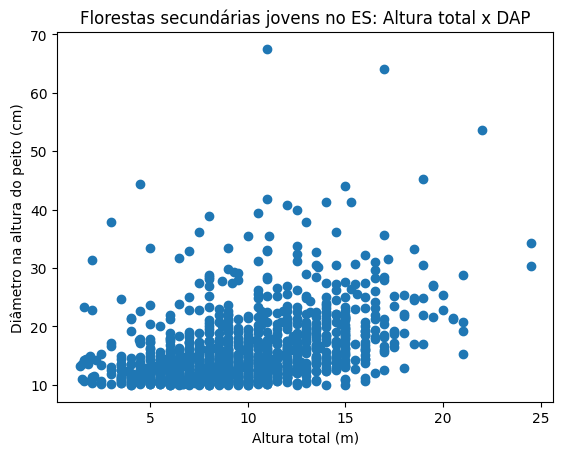

In [28]:
# Gráfico de dispersão simples HT x DAP
plt.scatter(dados['HT'], dados['DAP']) # gera o gráfico
plt.title('Florestas secundárias jovens no ES: Altura total x DAP') # insere o título
plt.xlabel('Altura total (m)') # insere o título no eixo x
plt.ylabel('Diâmetro na altura do peito (cm)') # insere o título no eixo y

Observa-se uma correlação linear positiva aparentemente mediana entre as variáveis altura total e DAP nas florestas secundárias jovens. Ou seja, há uma tendência de que quanto maior o diâmetro da árvore, maior será a sua altura. Além disso, é possível constatar que algumas observações se afastam das demais no gráfico, indicando a possível existência de valores discrepantes. Convém considerar o tratamento dos dados para retirada destes valores.

Text(0, 0.5, 'Altura do fuste (m)')

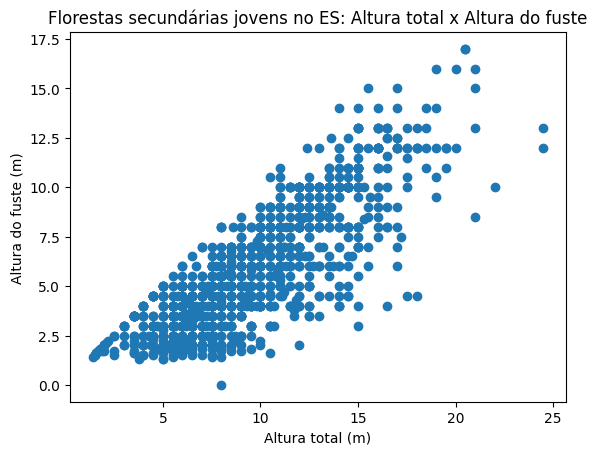

In [29]:
# Gráfico de dispersão simples HT x HF
plt.scatter(dados['HT'], dados['HF']) # gera o gráfico
plt.title('Florestas secundárias jovens no ES: Altura total x Altura do fuste') # insere o título
plt.xlabel('Altura total (m)') # insere o título no eixo x
plt.ylabel('Altura do fuste (m)') # insere o título no eixo y

No caso da relação entre a altura total e a altura do fuste observa-se uma correlação positiva mais evidente entre as variáveis. Além disso, há menos valores afastados das observações centrais e esse afastamento é menor. A altura do fuste é considerada como a altura do tronco da árvore até a sua primeira bifurcação. Consiste em uma variável mais difícil de medir que o DAP, porém mais fácil que a altura total. Portanto, convém considerá-la como possível variável para estimar a altura total.

Text(0, 0.5, 'Diâmetro na altura do peito (cm)')

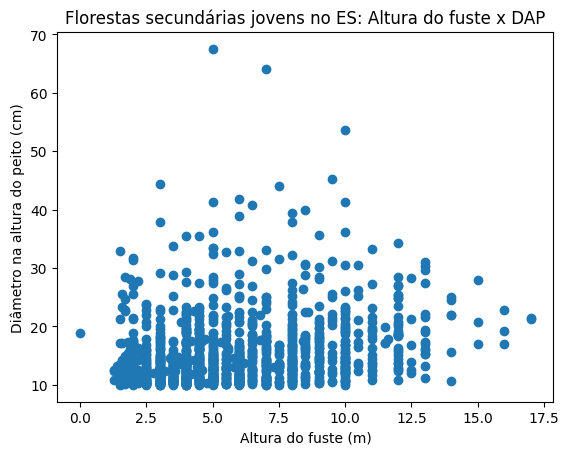

In [30]:
# Gráfico de dispersão simples HF x DAP
plt.scatter(dados['HF'], dados['DAP']) # gera o gráfico
plt.title('Florestas secundárias jovens no ES: Altura do fuste x DAP') # insere o título
plt.xlabel('Altura do fuste (m)') # insere o título no eixo x
plt.ylabel('Diâmetro na altura do peito (cm)') # insere o título no eixo y

Neste caso, observa-se um resultado similar ao da relação entre altura total e DAP. No entanto, aqui a correlação aparenta ser consideravelmente mais fraca.

Considerando o primeiro gráfico como o mais importante de acordo com os objetivos desta análise, convém detalhar um pouco mais sua visualização.

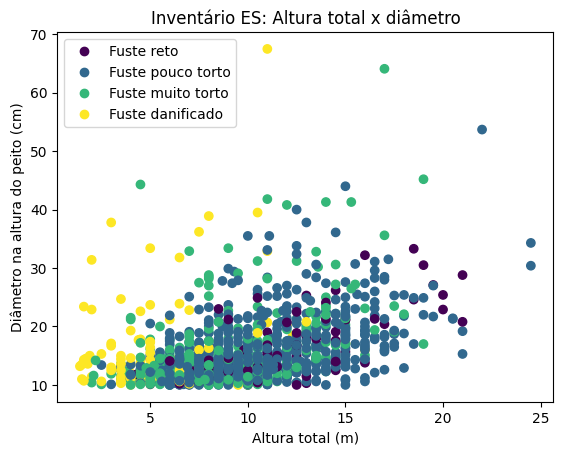

In [31]:
# Gráfico de dispersão HT x DAP colorindo os dados quanto à qualidade do fuste
scatter = plt.scatter(dados['HT'], dados['DAP'], c=dados['QF']) # gera o gráfico
plt.title('Inventário ES: Altura total x diâmetro') # insere o título
plt.xlabel('Altura total (m)') # insere o título no eixo x
plt.ylabel('Diâmetro na altura do peito (cm)') # inser o título no eixo y
plt.legend(handles=scatter.legend_elements()[0], labels=['Fuste reto', 'Fuste pouco torto', 'Fuste muito torto', 'Fuste danificado']) # insere e detalha a legenda

Verifica-se que a qualidade do fuste influencia na relação entre a altura total e o DAP. Muitas das observações mais afastadas de uma suposta reta de regressão apresentam fustes danificados ou muito tortos.

In [32]:
# Média do diâmetro à altura do peito, altura total e altura do fuste agrupando os dados pela qualidade do fuste
dados.groupby('QF')[['DAP', 'HT', 'HF']].mean()

,DAP,HT,HF
QF,,,
1,16.714667,11.874667,7.561333
2,15.288503,10.098396,6.052674
3,15.648125,8.998437,5.299375
4,16.219811,5.551887,4.301887


Observa-se que o DAP apresenta valores médios próximos para árvores com diferentes níveis de qualidade do fuste. Enquanto a altura tende a ser menor em árvores com fustes muito tortos ou danificados. Uma alternativa para melhorar a relação entre HT e DAP seria filtrar os dados retirando árvores danificadas. Por outro lado, florestas tropicais são ecossistemas originalmente diversos, toda essa variação é natural e deve ser considerada nas análises. Sendo assim, uma outra opção seria considerar QF como uma das variáveis a ser utilizada no modelo. 

In [33]:
# Definindo uma função para retornar os valores desejados
def num_per(param):
    quantidade = param.value_counts()
    percentual = (quantidade/param.count()) * 100
    print(quantidade)
    print(percentual)

# Quantidade e percentual de árvores em cada nível de qualidade do fuste
num_per(dados['QF'])

2    748
3    320
4    106
1     75
Name: QF, dtype: int64
2    59.887910
3    25.620496
4     8.486789
1     6.004804
Name: QF, dtype: float64


Verifica-se que retirar as árvores danificadas da amostra implicaria em remover menos de 10% das observações do dataset. O que pode ser considerado aceitável.

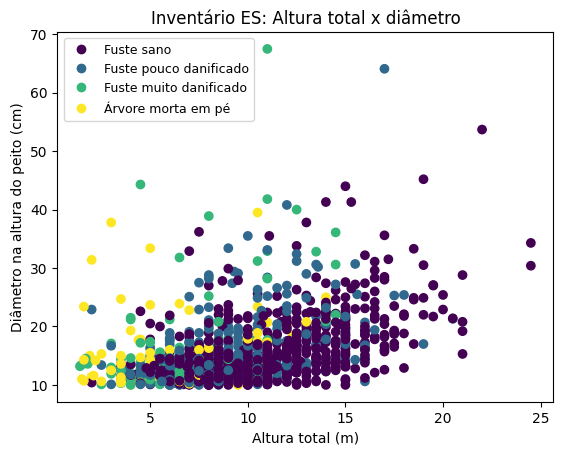

In [34]:
# Gráfico de dispersão HT x DAP colorindo os dados quanto à sanidade do fuste
scatter = plt.scatter(dados['HT'], dados['DAP'], c=dados['SA']) # gera o gráfico
plt.title('Inventário ES: Altura total x diâmetro') # insere o título
plt.xlabel('Altura total (m)') # insere o título no eixo x
plt.ylabel('Diâmetro na altura do peito (cm)') # inser o título no eixo y
plt.legend(handles=scatter.legend_elements()[0], labels=['Fuste sano', 'Fuste pouco danificado', 'Fuste muito danificado', 'Árvore morta em pé'], 
           loc='upper left', prop={'size': 9}) # insere e detalha a legenda

Varifica-se que a sanidade do fuste também influencia na relação entre HT e DAP. Similar à qualidade, árvores com fustes de menor sanidade estão entre as observações com valores discrepantes.

In [35]:
# Média do diâmetro à altura do peito, altura total e altura do fuste agrupando os dados pela sanidade do fuste
dados.groupby('SA')[['DAP', 'HT', 'HF']].mean()

,DAP,HT,HF
SA,,,
1,15.373464,10.643715,6.500000
2,15.510174,8.838953,5.069477
3,16.838532,6.956881,4.270642
4,15.472500,6.155000,4.786250


Assim como observado para QF, a média para o DAP apresenta pouca variação entre os níveis de SA. Enquanto a altura tende a diminuir para árvores com fustes de menor sanidade. Neste caso, convém retirar do dataset as árvores mortas em pé, já que para fins de inventário para licenciamento elas são menos importantes do que quando se deseja avaliar a dinâmica ou estágio de uma floresta. Ainda assim, seria válido considerar a presença da variável SA em um eventual modelo.

In [ ]:
# Quantidade e percentual de árvores em cada nível de sanidade da árvore
num_per(dados['SA'])

Verifica-se que retirar da base de dados as árvores em pé implicaria em uma redução de menos de 10% dos dados. O que pode ser considerado aceitável.

In [ ]:
# Gráfico de dispersão HT x DAP colorindo os dados quanto à posição fitossociológica
scatter = plt.scatter(dados['HT'], dados['DAP'], c=dados['PS']) # gera o gráfico
plt.title('Inventário ES: Altura total x diâmetro') # insere o título
plt.xlabel('Altura total (m)') # insere o título no eixo x
plt.ylabel('Diâmetro na altura do peito (cm)') # inser o título no eixo y
plt.legend(handles=scatter.legend_elements()[0], labels=['Emergente', 'Extrato superior', 'Extrato inferior', 'Sem estrato definido'],
           prop={'size': 9}) # insere e detalha a legenda

No caso deste gráfico, é possível observar claramente a divisão entre as posições fitossociológicas. Árvores mais antigas, consideradas com emergentes das copas das demais, apresentam maiores diâmetros e alturas, seguidas da árvores do extrato superior e por fim as do extrato inferior da floresta.

In [36]:
# Média do diâmetro à altura do peito, altura total e altura do fuste agrupando os dados pela posição fitossociológica
dados.groupby('PS')[['DAP', 'HT', 'HF']].mean()

,DAP,HT,HF
PS,,,
1,19.450368,12.790809,7.558456
2,15.361828,10.158423,6.228853
3,13.245542,6.596867,4.104096
4,14.200000,6.750000,2.875000


As médias de DAP e HT nos diferentes níveis de PS confirmam a interpretação que foi feita para o gráfico. Neste caso, seria válido filtrar os dados retirando árvores sem extrato definido, já que os valores dentro deste nívem fogem ao padrão. Além disso, qualquer modelo deve levar em consideração esta variável, podendo se ajustar um modelo para cada extrato.

In [37]:
# Quantidade e percentual de árvores em cada nível de sanidade da árvore
num_per(dados['PS'])

2    558
3    415
1    272
4      4
Name: PS, dtype: int64
2    44.675741
3    33.226581
1    21.777422
4     0.320256
Name: PS, dtype: float64


Verica-se que há apenas 4 árvores sem extrato definido no dateset, as quais convém remover.

Text(0.5, 0, 'Altura total (m)')

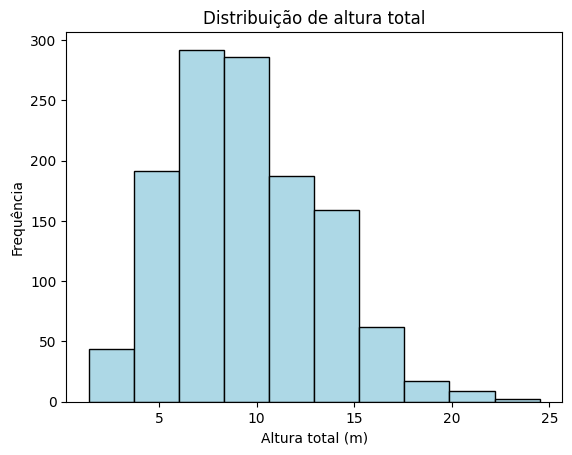

In [38]:
# Histograma para a altura total
plt.hist(dados['HT'], bins=10, edgecolor='black', color='lightblue')
plt.title('Distribuição de altura total')
plt.ylabel('Frequência')
plt.xlabel('Altura total (m)')

Detalhando a distribuição das frequências, pelo histograma da altura total verifica-se que há uma considerável assimétria à direita, demonstrando uma concentração de árvores nas classes (aproximadamente) entre 5 a 10 metros de altura. Outra aplicação comum do histograma é estimar gráficamente se os dados seguem o modelo normal de distribuição. Neste caso, devido à assimetria, a variável não aparenta seguir a distribuição normal.

Text(0.5, 0, 'Altura do fuste (m)')

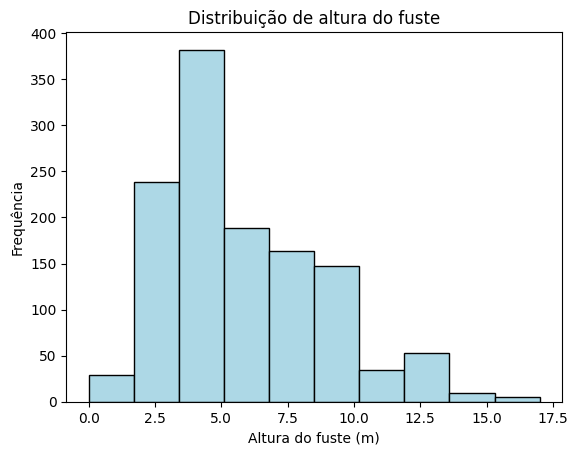

In [39]:
# Histograma para a altura do fuste
plt.hist(dados['HF'], bins=10, edgecolor='black', color='lightblue')
plt.title('Distribuição de altura do fuste')
plt.ylabel('Frequência')
plt.xlabel('Altura do fuste (m)')

Para altura do fuste observa-se uma assimentria à direita ainda mais pronunciada.

Text(0.5, 0, 'Diâmetro à altura do peito (cm)')

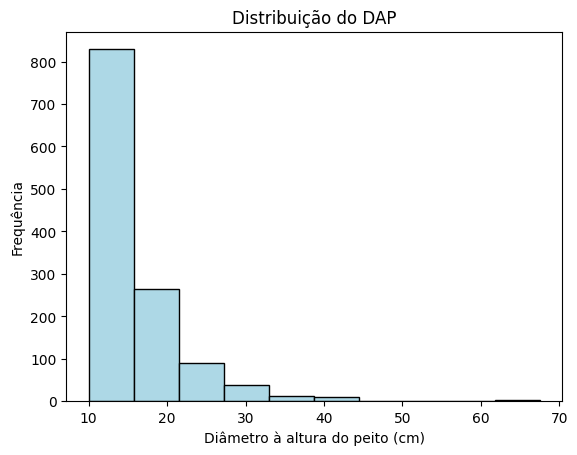

In [40]:
# Histograma para o diâmetro à altura do peito
plt.hist(dados['DAP'], bins=10, edgecolor='black', color='lightblue')
plt.title('Distribuição do DAP')
plt.ylabel('Frequência')
plt.xlabel('Diâmetro à altura do peito (cm)')

Para o DAP observa-se que as frequências se distribuem a partir dos 10 cm, considerando que está foi a variável e o valor de corte para considerar as árvores como adultas no IFN. Como se esta avaliando florestas jovens, verifica-se maior frequência nas classes mais baixas, descendendo exponensialmente até as classes com valores mais altos de DAP.

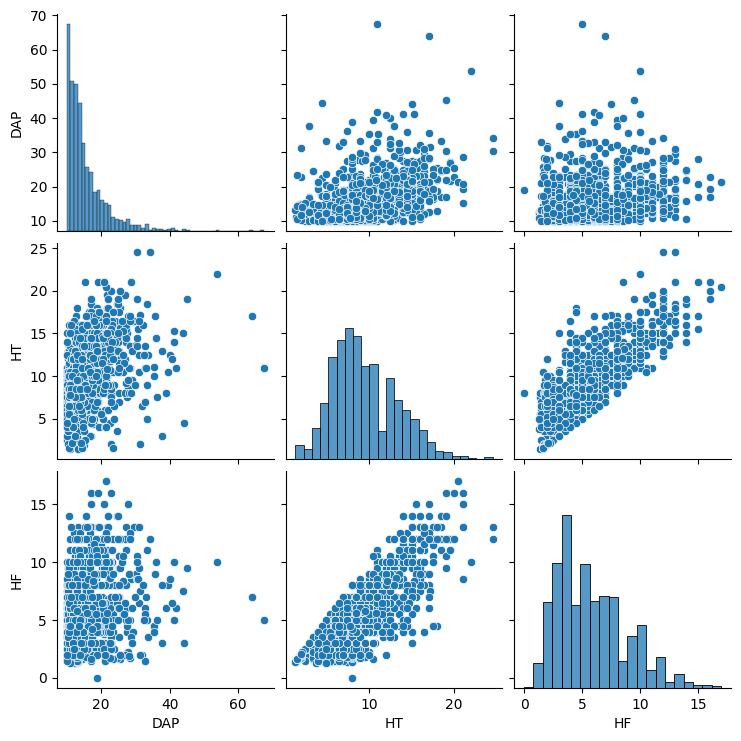

In [41]:
# Visualização conjunta dos gráficos já apresentados
sns.pairplot(dados[['DAP', 'HT', 'HF']])

Para o caso desta análise é conveniente avaliar e interpretar os gráficos um a um da maneira como se fez até o momento. No gráfico acima observam-se todos os histogramas e gráficos de dispersão para as três variáveis avaliadas até o momento. Esta poderia ser uma alternativa de visualização para um artigo ou relatório onde é desejável apresentar os gráficos em menor espaço.

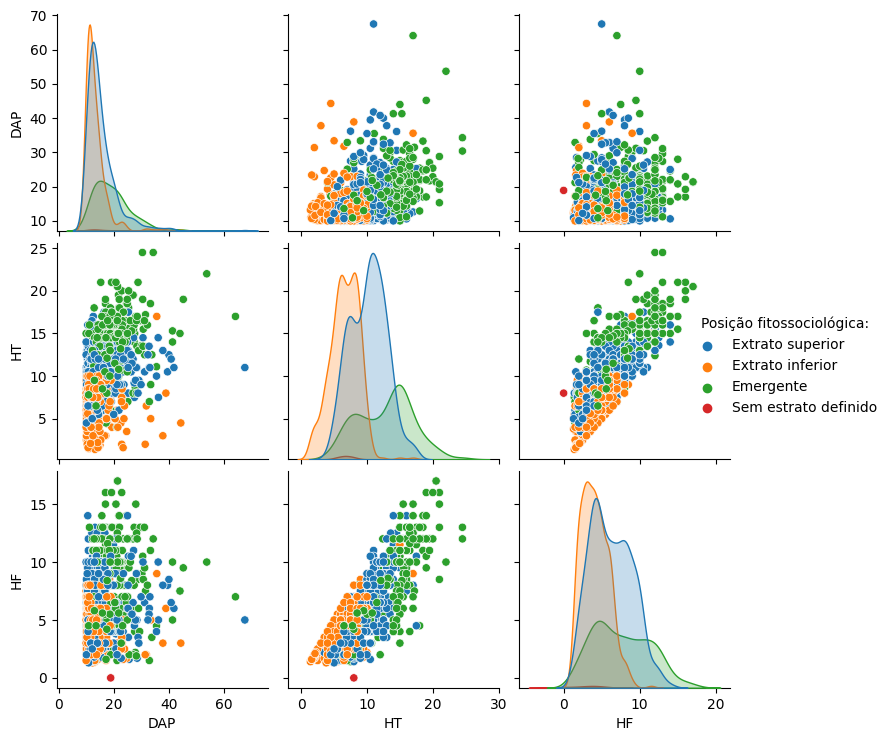

In [42]:
# Visualização conjunta dos gráficos dividindo as observações de acordo com a posição fitossociológica
g = sns.pairplot(data=dados[['DAP', 'HT', 'HF', 'PS']].astype({'PS': str}), hue='PS') # gera o gráfico
g._legend.set_title('Posição fitossociológica:') # insere o título na legenda
new_labels = ['Extrato superior', 'Extrato inferior', 'Emergente', 'Sem estrato definido'] # define os níveis do parâmetro PS
for t, l in zip(g._legend.texts, new_labels): # posiciona corretamente os nomes na legenda
    t.set_text(l)
g._legend.set_bbox_to_anchor((1.1, 0.5)) # posiciona a legenda

Assim como o gráfico anterior, este é apresentado apenas uma alternativa aos que foram previamente discutidos. Neste caso considerando as variáveis DAP, HT e HF em função da posição fitossociológica das árvores.

Text(0.5, 1.0, 'Altura do fuste (m)')

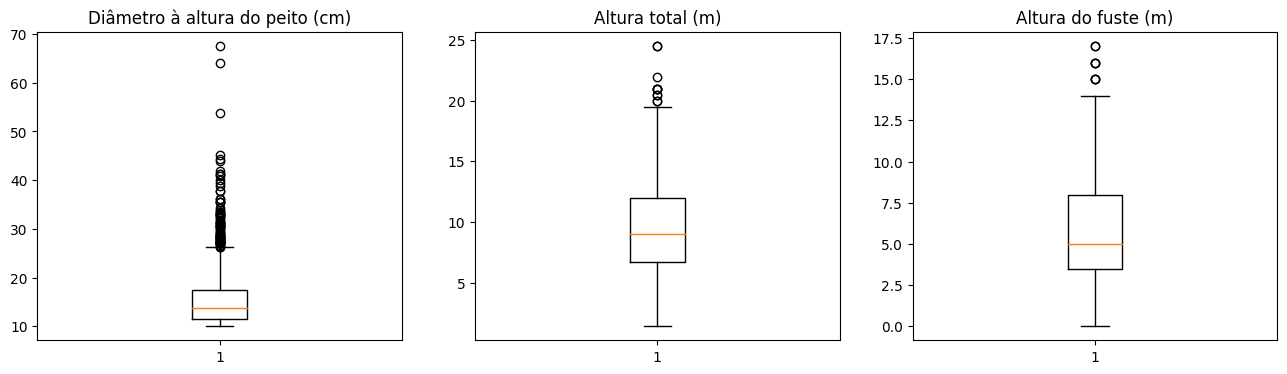

In [43]:
# Boxplot das variáveis contínuas
fig, ax = plt.subplots(1,3, figsize=(16, 4))
# subplot1: boxplot do DAP
ax[0].boxplot(dados['DAP'])
ax[0].set_title('Diâmetro à altura do peito (cm)')
# subplot2: boxplot da HT
ax[1].boxplot(dados['HT'])
ax[1].set_title('Altura total (m)')
# subplot3: boxplot da HF
ax[2].boxplot(dados['HF'])
ax[2].set_title('Altura do fuste (m)')

Os gráficos de caixa (boxplots) consistem em uma ótima maneira de visualizar os dados quanto a sua dispersão e tendência central. Pela visualização dos boxplots fica evidente a assimetria à direira das três variáveis (DAP, HT e HF), assim como a sua grande amplitude e variação. Também é possível visualizar graficamente que as três variáveis não apresentam distribuição normal. Por fim, a novidade que os boxplots trazem para a presente análise é a visualização de valores discrepantes (outliers). Observa-se que há outliers para as três variáveis, mas principalmente para o DAP. Uma avaliação mais detalhada e tratamento destes outliers é uma alternativa que deve ser considerada.   

In [44]:
# Correlação linear entre as variáveis

# Lista das variáveis que se deseja testar
vars_to_test = ['DAP', 'HT', 'HF']

# Teste de normalidade para cada variável
for var in vars_to_test:
    stat, p = shapiro(dados[var])
    print(f'{var}: Estatística de teste = {stat:.3f}, p-valor = {p:.3f}')

DAP: Estatística de teste = 0.761, p-valor = 0.000
HT: Estatística de teste = 0.977, p-valor = 0.000
HF: Estatística de teste = 0.945, p-valor = 0.000


O cálculo do coeficiente de correlação é uma maneira de atribuir um valor objetivo à relação entre as variáveis que foram avaliadas graficamente até o momento. Como não é correto utilizar o coeficiente para avaliar variáveis que não foram medidas em escala contínua, neste caso serão consideradas apenas DAP, HT e HF.

Para o cálculo do coeficiente de Pearson existe o pressuposto de que as variáveis possuam distribuição normal, o que neste caso foi avaliado pelo teste de Shapiro-Wilk. 

Para as três variáveis rejeitou-se a suposição de que os dados apresentam distribuição normal. Portanto optou-se por calcular o coeficiente de correlação de Spearman.

In [45]:
# Correlação linear pelo método de Spearman
dados[['DAP', 'HT', 'HF']].corr(method = 'spearman')

,DAP,HT,HF
DAP,1.000000,0.458731,0.275082
HT,0.458731,1.000000,0.807979
HF,0.275082,0.807979,1.000000


<Axes: >

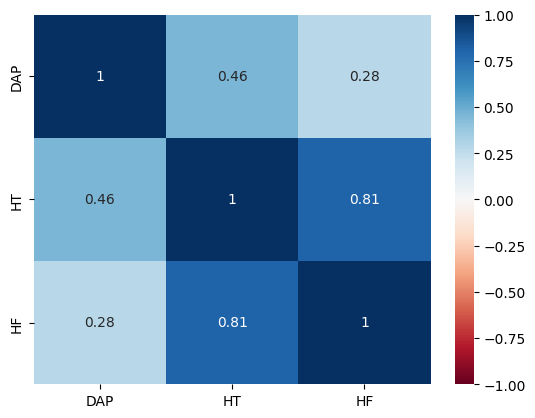

In [46]:
# Visualização da matriz de correlação
sns.heatmap(dados[['DAP', 'HT', 'HF']].corr(method = 'spearman'), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Conforme sugerido pelos gráficos de dispersão, existe uma forte correlação entre altura total e altura do fuste, uma correlação de fraca a mediana entre altura total e diâmetro e uma correlção fraca entre altura do fuste e o diâmetro. 

A correlação média / fraca entre HT e DAP sugere que não seria possível obter um modelo bem ajustado para essas variáveis. Dessa forma, avaliar o processamento dos dados para reduzir a variação observada. 

In [47]:
# Limpando os dados de acordo com as análises já realizadas.
dados_filtro = dados[(dados['QF'] != '4') & (dados['SA'] != 4) & (dados['PS'] != 4)]
round((dados_filtro['DAP'].count()/dados['DAP'].count()) * 100, 1) # percentual de árvores mantidas no dataset

93.3

Foi aplicada uma limpeza dos dados removendo árvores com fuste danificado, mortas em pé e sem extrato definido. Observa-se que mais de 90% das árvores foram mantidas no dataset, sendo respeitada a representatividade e diversidade dos dados oriundos de florestas naturais.

In [48]:
# Calcula o CV para os dados de interesse após o novo filtro
print('CV DAP =', end=' ') 
coef_var(dados_filtro['DAP'])
print('CV HT =', end=' ') 
coef_var(dados_filtro['HT'])
print('CV HF =', end=' ') 
coef_var(dados_filtro['HF'])

CV DAP = 38.89
CV HT = 37.58
CV HF = 50.9


O coeficiente de variação apresentou uma leve redução, demonstrando que os dados ainda possuem alta variabilidade e que mesmo após processamento já realizado pode ser difícil chegar a um bom modelo.

Text(0.5, 1.0, 'Altura do fuste (m)')

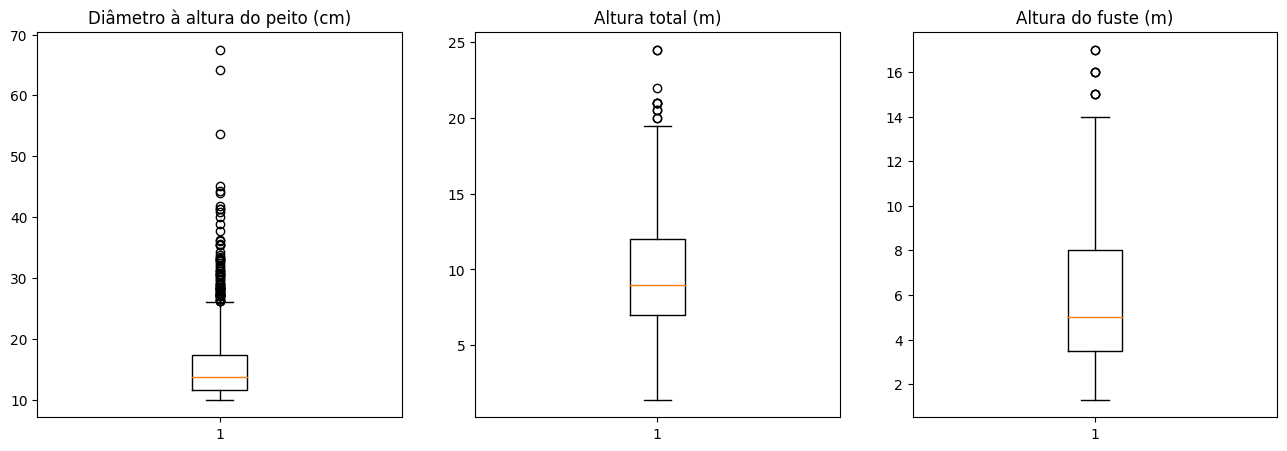

In [49]:
# Boxplot das variáveis contínuas após o filtro
fig, ax = plt.subplots(1,3, figsize=(16, 5))
# subplot1: boxplot do DAP
ax[0].boxplot(dados_filtro['DAP'])
ax[0].set_title('Diâmetro à altura do peito (cm)')
# subplot2: boxplot da HT
ax[1].boxplot(dados_filtro['HT'])
ax[1].set_title('Altura total (m)')
# subplot3: boxplot da HF
ax[2].boxplot(dados_filtro['HF'])
ax[2].set_title('Altura do fuste (m)')

Pelos boxplots verifica-se que ainda existem muitos valores discrepantes, principalmente para o diâmetro. Portanto, convém aprofundar está análise.

In [50]:
# Identificação de valores acima do limite superior do boxplot para DAP.
limite=np.percentile(dados_filtro['DAP'], 75, method='midpoint')+1.5*(np.percentile(dados_filtro['DAP'], 75, method='midpoint')-
                                                                      np.percentile(dados_filtro['DAP'], 25, method='midpoint'))
posicoes=dados_filtro.loc[dados_filtro['DAP']>=limite]['DAP'].count()
print("Limite superior:", round(limite, 1))
print("Quantidade de valores acima do limite superior:", posicoes, "ou em percentual", round((posicoes/dados_filtro['DAP'].count())*100, 1),'%')


Limite superior: 26.1
Quantidade de valores acima do limite superior: 72 ou em percentual 6.2 %


Usando o limite superior do boxplot como método para identificar outliers, observa-se que existem 72 valores discrepantes para o DAP (6,2% do total de árvores). Considerando a diversidade de florestas naturais, qualquer limpeza arbitrária dos dados pode ser considerada tecnicamente questionável. Como o percentual de árvores a serem retiradas do dataset é relativamente baixo, optou-se por aplicar mais esta limpeza. A substituição de valores discrepantes pela média ou mediana dos dados de DAP seria uma alternativa para a remoção caso o número de outliers fosse mais alto.

In [51]:
# Identificação de valores acima do limite superior do boxplot para HT.
limite=np.percentile(dados_filtro['HT'], 75, method='midpoint')+1.5*(np.percentile(dados_filtro['HT'], 75, method='midpoint')-
                                                                     np.percentile(dados_filtro['HT'], 25, method='midpoint'))
posicoes=dados_filtro.loc[dados_filtro['HT']>=limite]['HT'].count()
print("Limite superior:", round(limite, 1))
print("Quantidade de valores acima do limite superior:", posicoes, "ou em percentual", round((posicoes/dados_filtro['HT'].count())*100, 1),'%')

Limite superior: 19.5
Quantidade de valores acima do limite superior: 14 ou em percentual 1.2 %


In [52]:
# Identificação de valores acima do limite superior do boxplot para HF.
limite=np.percentile(dados_filtro['HF'], 75, method='midpoint')+1.5*(np.percentile(dados_filtro['HF'], 75, method='midpoint')-
                                                                     np.percentile(dados_filtro['HF'], 25, method='midpoint'))
posicoes=dados_filtro.loc[dados_filtro['HF']>=limite]['HF'].count()
print("Limite superior:", round(limite, 1))
print("Quantidade de valores acima do limite superior:", posicoes, "ou em percentual", round((posicoes/dados_filtro['HF'].count())*100, 1),'%')

Limite superior: 14.8
Quantidade de valores acima do limite superior: 8 ou em percentual 0.7 %


Há um percentual ainda menor de valores discrepantes para HT e HF. Assim, a limpeza também irá considerar os valores discrepantes destas variáveis. Antes, convém visualizar um último gráfico. 

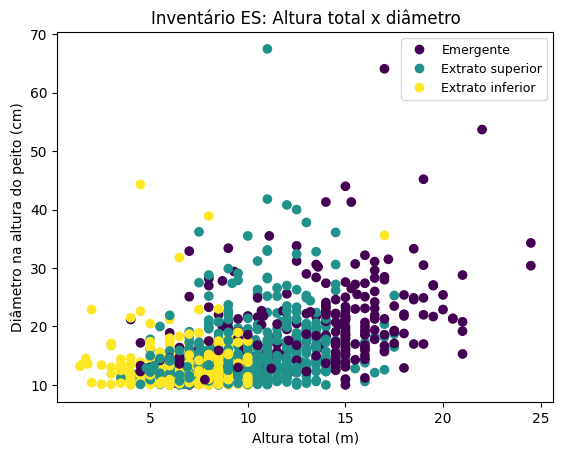

In [53]:
# Gráfico de dispersão HT x DAP colorindo os dados filtrados quanto à posição fitossociológica
scatter = plt.scatter(dados_filtro['HT'], dados_filtro['DAP'], c=dados_filtro['PS']) # gera o gráfico
plt.title('Inventário ES: Altura total x diâmetro') # insere o título
plt.xlabel('Altura total (m)') # insere o título no eixo x
plt.ylabel('Diâmetro na altura do peito (cm)') # inser o título no eixo y
plt.legend(handles=scatter.legend_elements()[0], labels=['Emergente', 'Extrato superior', 'Extrato inferior', 'Sem estrato definido'],
           prop={'size': 9}) # insere e detalha a legenda

A figura demosntra que os valores de DAP acima do limite superior se encontram nos três estratos, mas principalmente no superior e emergente. Este resultado dá suporte à limpeza dos outliers, demonstrando que não seriam retiradas apenas árvores de um grupo específico, o que poderia prejudicar a representatividade dos dados. 

Já para a altura, seriam retiradas apenas árvores do extrato emergente. mas neste caso serão retiradas um número menor de árvores.

In [54]:
# Limpando os dados uma segunda vez.
dados_filtro2 = dados_filtro[(dados_filtro['DAP'] <= 26.1) & (dados_filtro['HT'] <= 19.5) & (dados_filtro['HF'] <= 14.8)]
round((dados_filtro2['DAP'].count()/dados['DAP'].count()) * 100, 1) # percentual de árvores mantidas no dataset

86.8

Após a segunda limpeza aplicada nos dados de florestas secundárias jovens, verifica-se que 86,8% das árvores foram mantidas no dataset. Esta quantidade ainda pode ser considerada representativa, mas não é aconselhável remover mais dados.

Text(0.5, 1.0, 'Altura do fuste (m)')

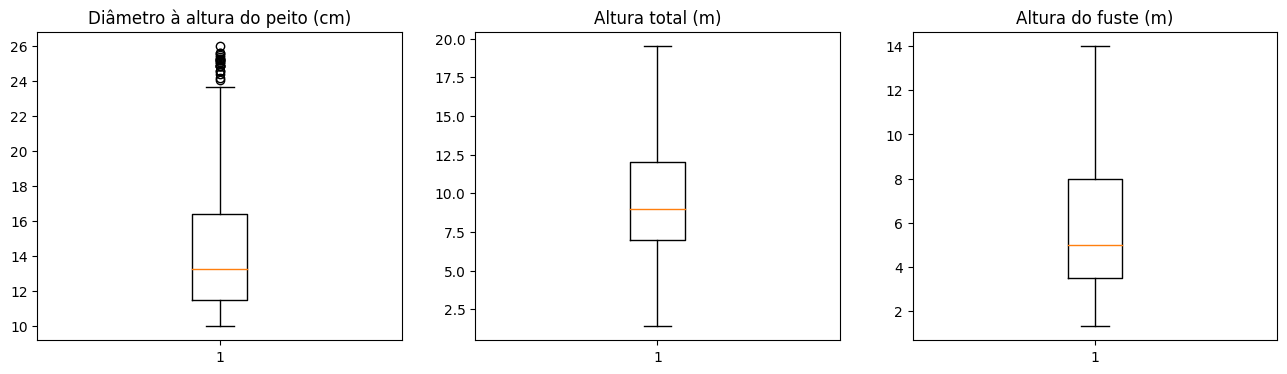

In [55]:
# Boxplot das variáveis contínuas após o filtro
fig, ax = plt.subplots(1,3, figsize=(16, 4))
# subplot1: boxplot do DAP
ax[0].boxplot(dados_filtro2['DAP'])
ax[0].set_title('Diâmetro à altura do peito (cm)')
# subplot2: boxplot da HT
ax[1].boxplot(dados_filtro2['HT'])
ax[1].set_title('Altura total (m)')
# subplot3: boxplot da HF
ax[2].boxplot(dados_filtro2['HF'])
ax[2].set_title('Altura do fuste (m)')

Observando os boxplot constata-se que não há mais valores discrepantes para altura total e altura do fuste. Para o diâmetro ainda existem valores discrepantes, mas a amplitude dos dados diminuiu consideravelmente.

In [56]:
# Calcula o CV para os dados de interesse após o novo filtro
print('CV DAP =', end=' ') 
coef_var(dados_filtro2['DAP'])
print('CV HT =', end=' ') 
coef_var(dados_filtro2['HT'])
print('CV HF =', end=' ') 
coef_var(dados_filtro2['HF'])

CV DAP = 25.7
CV HT = 35.95
CV HF = 49.59


Para o diâmetro o coeficiente de variação após a segunda limpeza ficou mediano, enquanto para altura total e do fuste apesar de ter diminuido ele permaneceu alto.

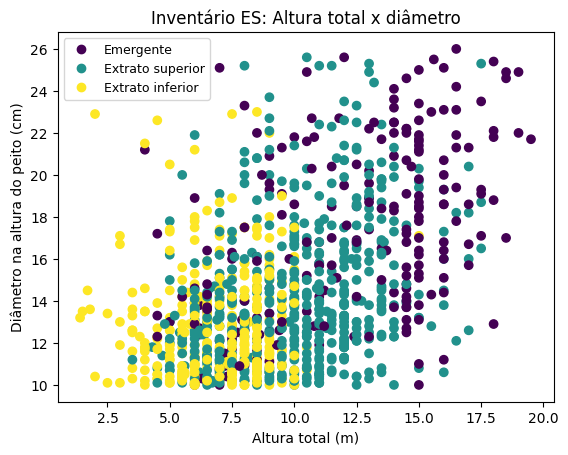

In [57]:
# Gráfico de dispersão HT x DAP colorindo os dados filtrados quanto à posição fitossociológica
scatter = plt.scatter(dados_filtro2['HT'], dados_filtro2['DAP'], c=dados_filtro2['PS']) # gera o gráfico
plt.title('Inventário ES: Altura total x diâmetro') # insere o título
plt.xlabel('Altura total (m)') # insere o título no eixo x
plt.ylabel('Diâmetro na altura do peito (cm)') # inser o título no eixo y
plt.legend(handles=scatter.legend_elements()[0], labels=['Emergente', 'Extrato superior', 'Extrato inferior', 'Sem estrato definido'],
           prop={'size': 9}) # insere e detalha a legenda

Verifica-se no gráfico de dispersão que após a segunda limpeza a correlação linear positiva entre o DAP e HT se tornou mais clara, apesar de ainda existirem muitos pontos afastados da reta de regressão imaginária.

Text(0.5, 1.05, 'Inventário ES: Altura total x diâmetro')

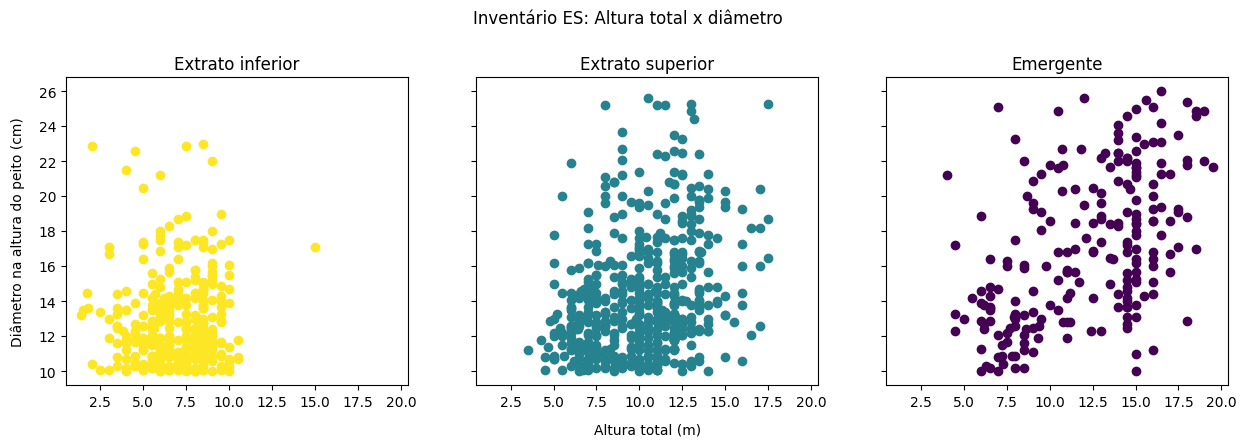

In [58]:
# Gráfico de dispersão entre HT e DAP separando as observações para cada posição fitossociológica.
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
# subplot1: gráfico para PS = 3
axs[0].scatter(dados_filtro2.loc[dados_filtro2['PS'] == 3, 'HT'], dados_filtro2.loc[dados_filtro2['PS'] == 3, 'DAP'], c='#FDE725FF') # gera o gráfico
axs[0].set_title('Extrato inferior') # título do subgráfico
axs[0].set_ylabel('Diâmetro na altura do peito (cm)', labelpad=10) # adiciona o título do eixo y
# subplot2: gráfico para PS = 2
axs[1].scatter(dados_filtro2.loc[dados_filtro2['PS'] == 2, 'HT'], dados_filtro2.loc[dados_filtro2['PS'] == 2, 'DAP'], c='#26828EFF') # gera o gráfico
axs[1].set_title('Extrato superior') # título do subgráfico
axs[1].set_xlabel('Altura total (m)', labelpad=10) # adiciona o título do eixo x
# subplot3: gráfico para PS = 1
axs[2].scatter(dados_filtro2.loc[dados_filtro2['PS'] == 1, 'HT'], dados_filtro2.loc[dados_filtro2['PS'] == 1, 'DAP'], c='#440154FF') # gera o gráfico
axs[2].set_title('Emergente') # título do subgráfico
# Adiciona um título geral para o gráfico
fig.suptitle('Inventário ES: Altura total x diâmetro', y=1.05)

Em detalhe, observamos que a correlação é mais evidente para árvores emergentes e menos evidente para árvores do extrato inferior. Este resultado reforça a estratégia de criar modelos diferentes para cada posição fitossosiológica ou, por exemplo, utilizar regressão logística para inserir variáveis categóricas no modelo.

<Axes: >

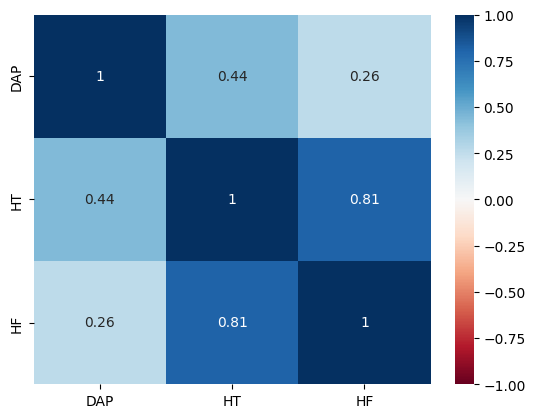

In [59]:
# Visualização da matriz de correlação para os dados filtrados
sns.heatmap(dados_filtro2[['DAP', 'HT', 'HF']].corr(method = 'spearman'), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Apesar das filtragens o coeficiente de correlação entre o diâmetro e a altura total não aumentou, permanecendo a correlação de fraca a mediana.

Text(0.5, 1.07, 'Correlação entre as variáveis para cada posição fitossociológica')

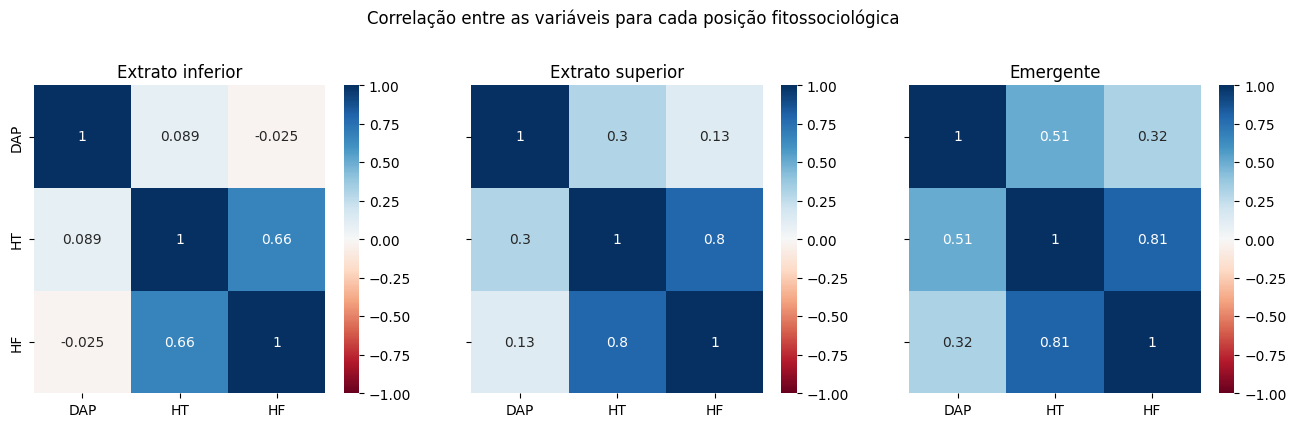

In [60]:
# Gráfico de dispersão entre HT e DAP separando as observações para cada posição fitossociológica.
fig, axs = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

# subplot1: gráfico para PS = 3
sns.heatmap(dados_filtro2.loc[dados_filtro2['PS'] == 3, ['DAP', 'HT', 'HF']].corr(method='spearman'), annot=True, cmap='RdBu', vmin=-1, vmax=1, ax=axs[0])
axs[0].set_title('Extrato inferior') # título do subgráfico

# subplot2: gráfico para PS = 2
sns.heatmap(dados_filtro2.loc[dados_filtro2['PS'] == 2, ['DAP', 'HT', 'HF']].corr(method='spearman'), annot=True, cmap='RdBu', vmin=-1, vmax=1, ax=axs[1])
axs[1].set_title('Extrato superior') # título do subgráfico

# subplot3: gráfico para PS = 1
sns.heatmap(dados_filtro2.loc[dados_filtro2['PS'] == 1, ['DAP', 'HT', 'HF']].corr(method='spearman'), annot=True, cmap='RdBu', vmin=-1, vmax=1, ax=axs[2])
axs[2].set_title('Emergente') # título do subgráfico

# Adiciona um título geral para o gráfico
fig.suptitle('Correlação entre as variáveis para cada posição fitossociológica', y=1.07)


Quando se avalia a correlação linear entre HT e DAP para cada posição fitossociológica verifica-se que ela é fraca para os extratos inferior e superior e moderada para o emergente. Já a relação entre a HT e a HF é de moderada a forte para o extrato inferior e superior e forte para árvores emergentes.

In [61]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    dados_filtro2[['DAP', 'HF']], dados_filtro2['HT'], test_size=0.30, random_state=0)

Encaminhando a conclusão do pré-processamento dos dados foi realizada a divisão do conjunto de dados em treino e teste. Decidiu-se por dividir o conjunto em 70% dos dados para treino e 30% para teste.

In [62]:
# Normalizando os dados de treino 
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

# Normalizando os dados de teste utilizando os valores máximos e mínimos dos dados de treino
X_test_norm = scaler.transform(X_test)

# Convertendo os dados normalizados de array para um dataframe
X_train_df = pd.DataFrame(X_train_norm , columns=['DAP_t', 'HF_t'])
X_test_df = pd.DataFrame(X_test_norm , columns=['DAP_t', 'HF_t'])

# Imprimindo as primeiras linhas para conferir
print(X_train_df.head())
print(X_test_df.head())

     DAP_t      HF_t
0  0.00625  0.055118
1  0.03125  0.039370
2  0.00625  0.031496
3  0.40000  0.291339
4  0.29375  0.370079
     DAP_t      HF_t
0  0.25000  0.055118
1  0.38750  0.251969
2  0.64375  0.212598
3  0.23750  0.291339
4  0.03125  0.094488


Na sequência foi realizada a normalização dos dados de treino e teste das variáveis explicativas. Optou-se pela normalização em detrimento da padronização, porque os dados não possuem distribuição normal. Foi feita cópia dos dados antes da normalização para que na etapa de modelagem possa ser testada a utilização dos dados com e sem transformação.

Os dados foram convertidos em data frame para gerar a visualização abaixo.

Text(0.5, 1.0, 'Altura do fuste normalizada no set de teste')

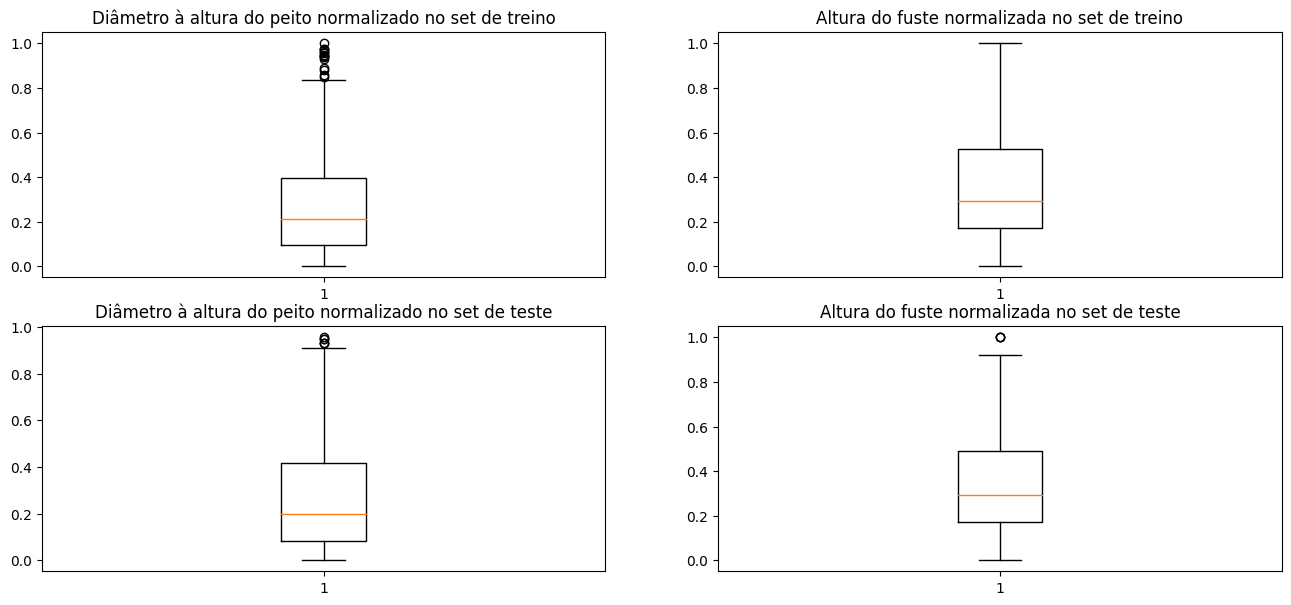

In [63]:
# Boxplot das variáveis contínuas após a normalização
fig, ax = plt.subplots(2,2, figsize=(16, 7))
# subplot1: boxplot do DAP transformado no set de treino
ax[0,0].boxplot(X_train_df['DAP_t'])
ax[0,0].set_title('Diâmetro à altura do peito normalizado no set de treino')
# subplot2: boxplot da HF transformada no set de treino
ax[0,1].boxplot(X_train_df['HF_t'])
ax[0,1].set_title('Altura do fuste normalizada no set de treino')
# subplot3: boxplot do DAP transformado no set de teste
ax[1,0].boxplot(X_test_df['DAP_t'])
ax[1,0].set_title('Diâmetro à altura do peito normalizado no set de teste')
# subplot2: boxplot da HF transformada no set de teste
ax[1,1].boxplot(X_test_df['HF_t'])
ax[1,1].set_title('Altura do fuste normalizada no set de teste')

Observa-se que a normalização deixou os dados de DAP e HF na mesma escala mantendo a sua variabilidade. Comparando os conjuntos de treino e teste, verifica-se que a mediana e a dispersão dos valores de ambas variáveis (DAP e HF) são diferentes entre os conjuntos, mas estão bem próximos.

**CONCLUSÃO**

Os resultados demonstram que há um maior potencial de estimar a altura total a partir da altura do fuste. Apesar de a altura do fuste ser mais fácil de mensurar que a total, o ideal era que a estimativa da altura total fosse feita a partir do diâmetro à altura do peito, que é uma variável ainda mais fácil de ser mensurada. Porém, a associação entre essas variáveis talvez não seja forte o suficiente para gerar um bom modelo.

A transformação...
A amostragem com validação cruzada estratificada dos dados também seria uma alternativa de pré-processamento que pode dar resultados para os dados em questão. Na etapa de modelagem outras técnicas, por exemplo regressão múltipla ou logística, podem ser consideradas para gerar um modelo que possa estimar a altura total com certa precisão. 

A alta diversidade existente em florestas naturais reflete em uma grande variação dos dados e pode ser considerada uma barreira para o ajuste de modelos com alto nível de precisão. Na prática, para convencer um determinado órgão ambiental a aceitar um inventário feito totalmente com a altura total estimada a partir de outra (s) variável (is), será necessário demonstrar que o modelo possui alto grau de precisão. Portanto, cabe avaliar se vale a pena manter o projeto atual e proceder com outras técnicas de processamento de dados para depois proceder com a modelagem.